# TALLER Ciencia de Datos en la Vida Real. 
### Aplicación de Ciencia de Datos en Periodismo

## Primer Paso: 
- PRELIMINARES: Instalación de paquetes que voy a necesitar.

In [25]:
# Preliminares

import os  # módulo incorporado en Python que permite utilizar funcionalidades dependientes del sistema operativo        
import numpy as np
import pandas as pd
import requests # HTTP request web
from io import StringIO # tipo de dato string 
import seaborn as sns
import matplotlib.pyplot as plt


 **Librería Numpy:** 
 Principal librería en Python y ampliamente usada cs de datos:

- Soporte para arreglos y matrices multidimensionales. (ndarray)
- funciones matemáticas.
- Indexación y segmentación.
- Transmisión(broadcasting) 

**Librería Pandas:**
Manipulación y análisis de datos en Python
Podemos pensar de ella como una versión poderosa de excel con más herramientas.

- Manipulación de datos
- Indexación y selección
- Operaciones y cálculos
- Limpieza y preparación de datos
- Visualización de datos



### SEGUNDO PASO: 
- RAW DATA COLECTED: CAPTURA DE DATOS

# Importaremos datos del sitio del INDEC de Argentina los datos correspondientes a CENSO2022

# URL del archivo CSV descargado desde: 
url = 'https://www.indec.gob.ar/ftp/c2022_tp_est_c2.csv'

archivodescargado = 'c2022_tp_est_c2.csv'  # Nombre del archivo destino

# Realizamos la solicitud GET al servidor para obtener el contenido del archivo
respuesta = requests.get(url)

# Verificamos si la solicitud fue exitosa (código de estado 200)
if respuesta.status_code == 200:
    with open(archivo_descargado, 'wb') as archivo:
        archivo.write(respuesta.content)
    print("Archivo descargado exitosamente como", archivo_descargado)
else:
    print("Error al descargar el archivo. Código de estado:", respuesta.status_code)



In [26]:
# Reviso la tabla de datos

provincias_arg= pd.read_csv('data/archivo_descargado.csv', delimiter=';') # dataframe 
provincias_arg.head(3)


,Codigo,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,2.0,Ciudad Autónoma de Buenos Aires,206,2890151,"14450,8",3121707,"15161,3"
1,6.0,Buenos Aires,305907,15625084,"50,8",17523996,"57,3"
2,NaN,24 Partidos del Gran Buenos Aires,3773,9916715,"2694,8",10849299,"2875,3"


In [27]:
# Reviso tipo de datos convertido 

provincias_arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         24 non-null     float64
 1   Jurisdiccion   26 non-null     object 
 2   Superficie     26 non-null     int64  
 3   Poblacion2010  26 non-null     int64  
 4   Densidad2010   26 non-null     object 
 5   Poblacion2022  26 non-null     int64  
 6   Densidad2022   26 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.6+ KB


## TERCER PASO
- **CLEAN DATASET**: Limpiamos Datos
  
  Descubrimiento y corrección o eliminación de registros de datos erróneos de una tabla o base de datos


#### Data cleansing es un paso esencial para cualquier proceso analítico y normalmente incluye estos pasos:



![ETAPAS](www/cleansing.jpg)



- **Deduplicar**
- **Quitar observaciones irrelevantes**
- **Administrar datos incompletos**
- **Identificar valores atípicos**
- **Corregir errores estructurales**
- **Validar**
  
Podemos adicionar: 

+ **Método Estadístico**


  Nota: Hay diferentes herramientas, aquí estamos utilizando la librería [Pandas](https://pandas.pydata.org/)

In [28]:
# Columnas para convertir (excepto 'Jurisdiccion')
cols = provincias_arg.columns.difference(['Jurisdiccion'])

# Convertir float
provincias_arg[cols] = provincias_arg[cols].replace(',', '.', regex=True).astype(float)

# Reviso tipo de datos convertido 

provincias_arg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         24 non-null     float64
 1   Jurisdiccion   26 non-null     object 
 2   Superficie     26 non-null     float64
 3   Poblacion2010  26 non-null     float64
 4   Densidad2010   26 non-null     float64
 5   Poblacion2022  26 non-null     float64
 6   Densidad2022   26 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.6+ KB


In [29]:
# Revisamos donde estan los NaN en la columna codigo

# Filtramos las filas donde la columna 'Codigo' contenga valores NaN
rows_nan = provincias_arg[provincias_arg['Codigo'].isna()]

# Mostramos las filas con NaN 
print(rows_nan)



   Codigo                                       Jurisdiccion  Superficie  \
2     NaN                  24 Partidos del Gran Buenos Aires      3773.0   
3     NaN  Resto de partidos de la Provincia\nde Buenos A...    302134.0   

   Poblacion2010  Densidad2010  Poblacion2022  Densidad2022  
2      9916715.0        2694.8     10849299.0        2875.3  
3      5708369.0          18.8      6674697.0          22.1  


In [30]:
# Eliminar filas con NaN en la columna 'Codigo'

provincias_arg = provincias_arg.drop([2,3])


In [31]:
# Rápida mirada completa 
provincias_arg.head(25)

,Codigo,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,2.0,Ciudad Autónoma de Buenos Aires,206.0,2890151.0,14450.8,3121707.0,15161.3
1,6.0,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
4,10.0,Catamarca,101486.0,367828.0,3.6,429562.0,4.2
5,22.0,Chaco,99763.0,1055259.0,10.6,1129606.0,11.3
6,26.0,Chubut,224302.0,509108.0,2.3,592621.0,2.6
7,14.0,Córdoba,164708.0,3308876.0,20.0,3840905.0,23.3
8,18.0,Corrientes,89123.0,992595.0,11.3,1212696.0,13.6
9,30.0,Entre Ríos,78384.0,1235994.0,15.7,1425578.0,18.2
10,34.0,Formosa,75488.0,530162.0,7.4,607419.0,8.0
11,38.0,Jujuy,53244.0,673307.0,12.7,811611.0,15.2


In [32]:
#Seleccionamos las columnas que vamos a usar: 


arg_final = provincias_arg[["Jurisdiccion", "Superficie", "Poblacion2010", "Densidad2010", "Poblacion2022", "Densidad2022"]]
arg_final.head(26)


,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,Ciudad Autónoma de Buenos Aires,206.0,2890151.0,14450.8,3121707.0,15161.3
1,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
4,Catamarca,101486.0,367828.0,3.6,429562.0,4.2
5,Chaco,99763.0,1055259.0,10.6,1129606.0,11.3
6,Chubut,224302.0,509108.0,2.3,592621.0,2.6
7,Córdoba,164708.0,3308876.0,20.0,3840905.0,23.3
8,Corrientes,89123.0,992595.0,11.3,1212696.0,13.6
9,Entre Ríos,78384.0,1235994.0,15.7,1425578.0,18.2
10,Formosa,75488.0,530162.0,7.4,607419.0,8.0
11,Jujuy,53244.0,673307.0,12.7,811611.0,15.2


In [33]:
# Cambiar el nombre largo por uno más corto

arg_final.loc[arg_final['Jurisdiccion'] == 'Ciudad Autónoma de Buenos Aires', 'Jurisdiccion'] = 'CABA'
arg_final.head(3)


,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,CABA,206.0,2890151.0,14450.8,3121707.0,15161.3
1,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
4,Catamarca,101486.0,367828.0,3.6,429562.0,4.2


### Desafíos y Problemas

- **Corrección de Error y pérdida de información**
- **Mantenimiento de Datos Limpiados**
- **Limpieza de Datos en Entornos virtualmente Integrados**
- **Limpieza de datos en el Framework**


### CUARTO PASO:
**EXPLORATORY DATA ANALYSIS:** Exploración de datos. 

>Primer paso del análisis de datos para explorar y visualizar datos que nos permite descubrir conocimientos desde el mismo inicio...
o patrones para continuar luego profundizando.


**Fases del análisis exploratorio de datos:** 


+ **Primer Paso:** Tener clara la pregunta que queremos responder;
+ **Segundo Paso** Tener una idea general de nuestro dataset;
+ **Tercer Paso** Definir los tipos de datos que tenemos;
+ **Cuarto Paso** Elegir el tipo de estadística descriptiva;
+ **Quinto Paso** Visualizar los datos;
+ **Sexto Paso** Analizar las posibles interacciones entre las variables del dataset;
+ **Séptimo Paso** Extraer algunas conclusiones de todo este análisis.

**Notas de Interés:**
  
Visualización de datos puede significar dos cosas:
  
+ **visualizar datos para uno mismo**, así que sinónimo de eso es el análisis exploratorio de datos,
+ o **visualizarlo para otros** Es decir hacer buenos gráficos que las personan puedan comprender. 

+ Podemos trabajar en el análisis exploratorio de datos, buscando saber algo más de probabilidad y algo más de estadística para buscar patrones entre variables.  Una parte muy importante de la exploración de datos es entender cómo es la relación entre **x e y**


A la exploración de datos  **EDA** podemos separarla en tres grandes fases: 

  ![Etapas EDA](www/EDA.jpg)


> Una forma de entender, visualizar y extraer información relevante del set de datos para  decidir cuál será la ruta o técnica más adecuada para su posterior procesamiento.


In [34]:
# Revisamos las Jurisdicciones con mayor cantidad de población 


max = arg_final.nlargest(3, 'Poblacion2022')
print(max)


    Jurisdiccion  Superficie  Poblacion2010  Densidad2010  Poblacion2022  \
1   Buenos Aires    305907.0     15625084.0          50.8     17523996.0   
7        Córdoba    164708.0      3308876.0          20.0      3840905.0   
22      Santa Fe    133249.0      3194537.0          24.0      3544908.0   

    Densidad2022  
1           57.3  
7           23.3  
22          26.6  


In [35]:
# Revisamos las Jurisdicciones con menor cantidad de población 

min = arg_final.nsmallest(3, 'Poblacion2022')
print(min)

             Jurisdiccion  Superficie  Poblacion2010  Densidad2010  \
24  Tierra del FuegoIslas    910324.0       127205.0           0.1   
21             Santa Cruz    244458.0       273964.0           1.1   
12               La Pampa    143493.0       318951.0           2.2   

    Poblacion2022  Densidad2022  
24       185732.0           0.2  
21       337226.0           1.4  
12       361859.0           2.5  


In [36]:
# Revisamos las Jurisdicciones con mayor densidad
max_den = arg_final.nlargest(3, 'Densidad2022')
print(max_den)





    Jurisdiccion  Superficie  Poblacion2010  Densidad2010  Poblacion2022  \
0           CABA       206.0      2890151.0       14450.8      3121707.0   
25       Tucumán     22592.0      1448188.0          64.3      1731820.0   
1   Buenos Aires    305907.0     15625084.0          50.8     17523996.0   

    Densidad2022  
0        15161.3  
25          76.7  
1           57.3  


In [37]:
# Revisamos las Jurisdicciones con menor densidad hab/km2

min_densidad = arg_final.nsmallest(3, 'Densidad2022')
print(max_den)


    Jurisdiccion  Superficie  Poblacion2010  Densidad2010  Poblacion2022  \
0           CABA       206.0      2890151.0       14450.8      3121707.0   
25       Tucumán     22592.0      1448188.0          64.3      1731820.0   
1   Buenos Aires    305907.0     15625084.0          50.8     17523996.0   

    Densidad2022  
0        15161.3  
25          76.7  
1           57.3  


In [38]:
# Max  Superficie km2

max_superficie = arg_final.nlargest(3, 'Superficie')
max_superficie

,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
24,Tierra del FuegoIslas,910324.0,127205.0,0.1,185732.0,0.2
1,Buenos Aires,305907.0,15625084.0,50.8,17523996.0,57.3
21,Santa Cruz,244458.0,273964.0,1.1,337226.0,1.4


In [39]:
# Min Superficie km2

min_superficie = arg_final.nsmallest(3, 'Superficie')
min_superficie


,Jurisdiccion,Superficie,Poblacion2010,Densidad2010,Poblacion2022,Densidad2022
0,CABA,206.0,2890151.0,14450.8,3121707.0,15161.3
25,Tucumán,22592.0,1448188.0,64.3,1731820.0,76.7
15,Misiones,29911.0,1101593.0,37.0,1278873.0,42.8


In [40]:
# Densidades Totales 2010


total_p_2010 = arg_final['Poblacion2010'].sum()
total_sup = arg_final['Superficie'].sum()
dens_2010 = total_p_2010 / total_sup
dens_2010



10.931952661109461

In [42]:
# Totales 2022

total_p = arg_final['Poblacion2022'].sum()
total_sup = arg_final['Superficie'].sum()
dens_2022 = total_p / total_sup
dens_2022

12.505697997934442

In [43]:
diferencia = dens_2022 - dens_2010
diferencia

1.573745336824981

In [44]:
# Resumenes estadisticos Densidad 2010

summary_dens = arg_final[['Densidad2010', 'Densidad2022']].describe()
print(summary_dens)


       Densidad2010  Densidad2022
count     24.000000     24.000000
mean     615.237500    646.991667
std     2947.005711   3091.590557
min        0.100000      0.200000
25%        3.675000      4.200000
50%        7.700000      9.300000
75%       16.775000     19.475000
max    14450.800000  15161.300000


In [45]:
# Vamos a utilizar la librería matplotlib


densidades = summary_dens.drop(['count', 'mean'])

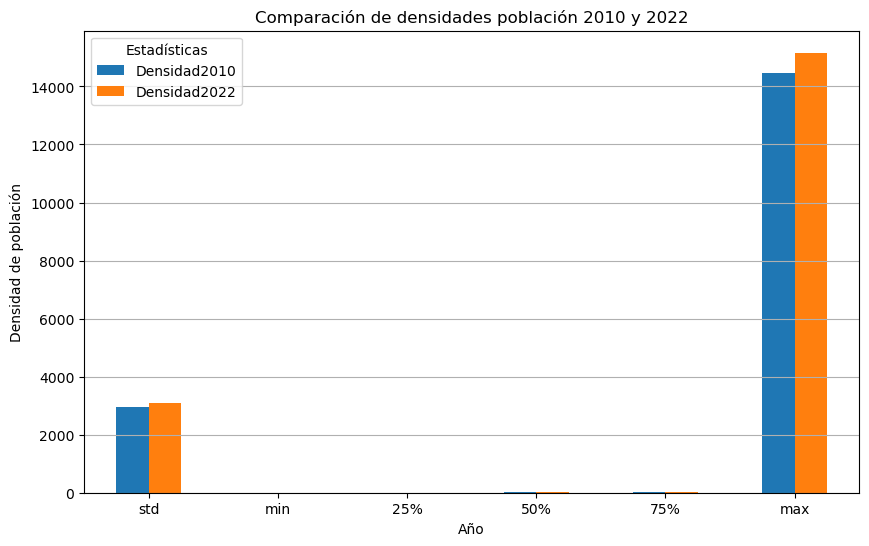

In [47]:
# Crear el gráfico de barras exploratorio

densidades.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de densidades población 2010 y 2022')
plt.xlabel('Año')
plt.ylabel('Densidad de población')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad
plt.legend(title='Estadísticas')
plt.grid(axis='y')  # Agregar rejilla en el eje y para mayor claridad
plt.show()

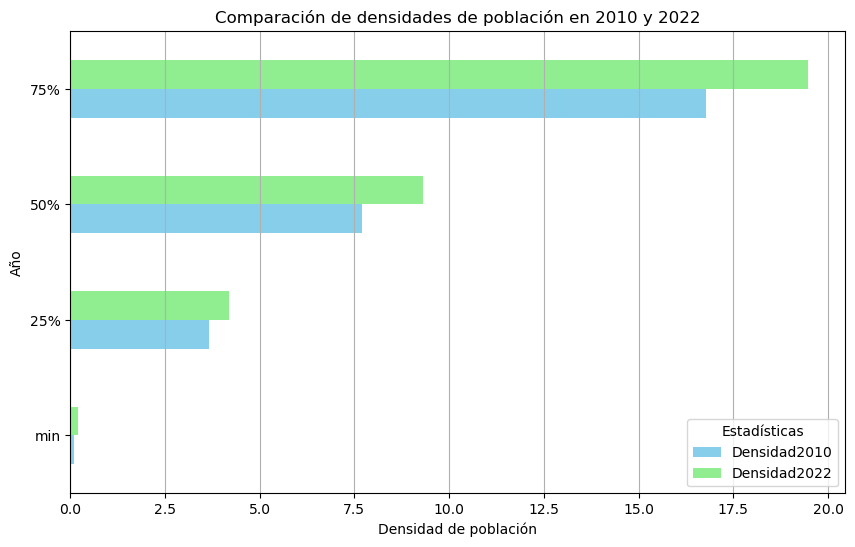

In [136]:
# Seleccionar sin max
densidades_1 = summary_dens.loc[['min', '25%', '50%', '75%']]

densidades_1.plot(kind='barh', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Comparación de densidades de población en 2010 y 2022')
plt.xlabel('Densidad de población')
plt.ylabel('Año')
plt.yticks(rotation=0)  # Rotar las etiquetas del eje y para mayor claridad
plt.legend(title='Estadísticas')
plt.grid(axis='x')  # Agregar rejilla en el eje x para mayor claridad
plt.show()


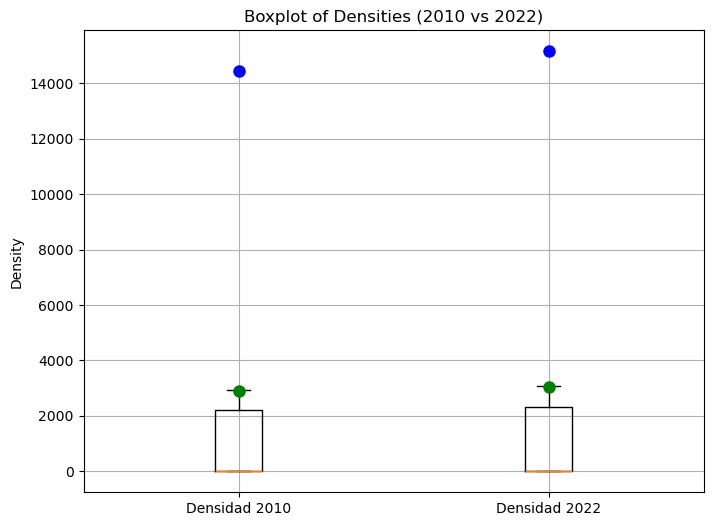

In [48]:
# Boxplot

plt.figure(figsize=(8, 6))

# Plot boxplots
bp = plt.boxplot([densidades["Densidad2010"], densidades["Densidad2022"]], labels=["Densidad 2010", "Densidad 2022"])

# Mark the max with a different marker and color
plt.plot([1, 2], [densidades.max()["Densidad2010"], densidades.max()["Densidad2022"]], marker='o', color='blue', markersize=8, linestyle='None')

# Mark the mean with a different marker and color
plt.plot([1, 2], [densidades.mean()["Densidad2010"], densidades.mean()["Densidad2022"]], marker='o', color='green', markersize=8, linestyle='None')

plt.title('Boxplot of Densities (2010 vs 2022)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

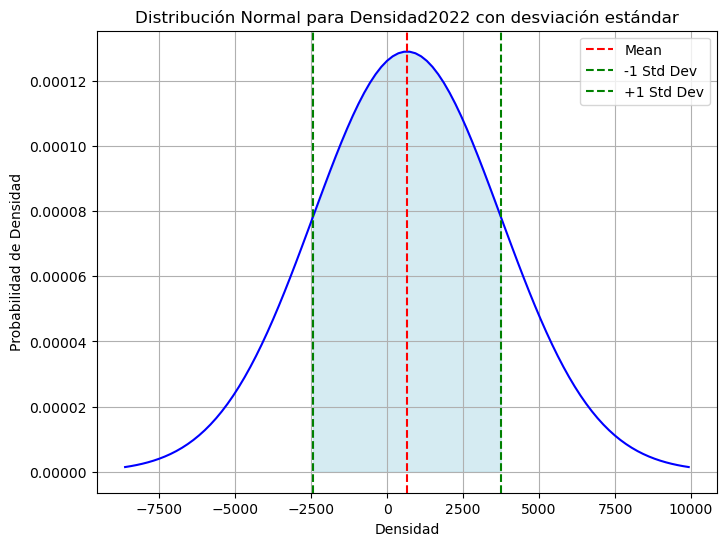

In [138]:
# Mean  y  standard deviation,  Densidad2022
mean_dens2022 = 646.991667
std_dens2022 = 3091.590557

# Generando data points para distribución normal 
x = np.linspace(mean_dens2022 - 3*std_dens2022, mean_dens2022 + 3*std_dens2022, 100)
y = (1/(std_dens2022 * np.sqrt(2 * np.pi))) * np.exp(-((x - mean_dens2022) ** 2) / (2 * std_dens2022 ** 2))

# Grafica 
plt.figure(figsize=(8, 6))
sns.lineplot(x=x, y=y, color='blue')

# Señalamos con color mean con color rojo 
plt.axvline(x=mean_dens2022, color='red', linestyle='--', label='Mean')

# Mark ±1 standard deviation con color verde 
plt.axvline(x=mean_dens2022 - std_dens2022, color='green', linestyle='--', label='-1 Std Dev')
plt.axvline(x=mean_dens2022 + std_dens2022, color='green', linestyle='--', label='+1 Std Dev')

# Relleno entre ±1 desviación estándar con color azul claro.
plt.fill_between(x, y, where=(x >= mean_dens2022 - std_dens2022) & (x <= mean_dens2022 + std_dens2022), color='lightblue', alpha=0.5)

plt.title('Distribución Normal para Densidad2022 con desviación estándar')
plt.xlabel('Densidad')
plt.ylabel('Probabilidad de Densidad')
plt.legend()
plt.grid(True)
plt.show()

###  TRANSFORMACION DE DATOS

In [50]:
### Voy a trabajar con los datos de densidad 2022 

In [49]:
# Creamos variables que dividan las densidades por grupos que contengan rangos de densidades 

arg_final['clasif_dens_2022'] = pd.cut(arg_final['Densidad2022'],
                                            bins=[-np.inf, 10, 20, 30, np.inf],
                                            labels=['menos_diez hab/km2', 'entre_10y20 hab/km2',
                                                    'entre_20y30 hab/km2', 'mas_30 hab/km2'])


In [50]:
# Mas categorias

sur = provincias_arg[provincias_arg['Jurisdiccion'].isin(['La Pampa', 'Santa Cruz', 'San Luis', 'Chubut', 'Neuquén', 'Río Negro',
                                                          'San Juan', 'Mendoza', 'Tierra_delFuego'])]

norte = provincias_arg[provincias_arg['Jurisdiccion'].isin(['CABA', 'Tucumán', 'Buenos Aires',
                                                            'Misiones', 'Santa Fe', 'Córdoba', 'Entre Ríos', 'Jujuy',
                                                            'Corrientes', 'Chaco', 'Salta', 'Formosa', 'Santiago del Estero',
                                                            'Catamarca', 'La Rioja'])]



In [53]:
# Comparación Estadística 
# Resumenes estadisticos Densidad 2010

#summary_dens = arg_final[['Densidad2010', 'Densidad2022']].describe()
#print(summary_dens)

summary_norte = norte['Densidad2022'].describe()
summary_norte



count    14.000000
mean     22.742857
std      21.709860
min       4.200000
25%       8.325000
50%      14.400000
75%      25.775000
max      76.700000
Name: Densidad2022, dtype: float64

In [143]:
summary_sur= sur['Densidad2022'].describe()
summary_sur


count     8.000000
mean      5.987500
std       4.211019
min       1.400000
25%       2.575000
50%       5.450000
75%       7.950000
max      13.700000
Name: Densidad2022, dtype: float64

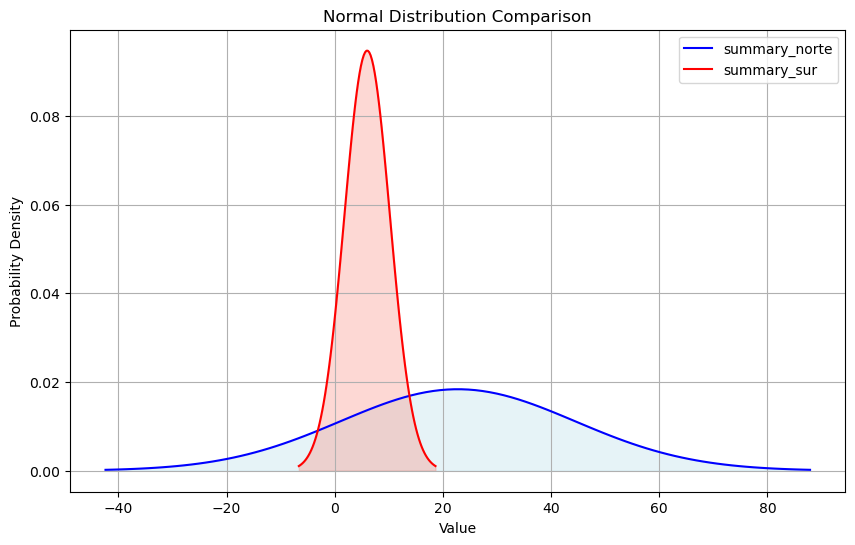

In [56]:
# Mean ay standard deviation para summary_norte
mean_norte = 22.742857
std_norte = 21.709860

# Mean y standard deviation para summary_sur
mean_sur = 5.987500
std_sur = 4.211019

# Generamos data points para la distribución normal de summary_norte
x_norte = np.linspace(mean_norte - 3*std_norte, mean_norte + 3*std_norte, 100)
y_norte = (1/(std_norte * np.sqrt(2 * np.pi))) * np.exp(-((x_norte - mean_norte) ** 2) / (2 * std_norte ** 2))

# Generamos data points para la distribución normal de  summary_sur
x_sur = np.linspace(mean_sur - 3*std_sur, mean_sur + 3*std_sur, 100)
y_sur = (1/(std_sur * np.sqrt(2 * np.pi))) * np.exp(-((x_sur - mean_sur) ** 2) / (2 * std_sur ** 2))

# Plot para distribución normal 
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_norte, y=y_norte, color='blue', label='summary_norte')
sns.lineplot(x=x_sur, y=y_sur, color='red', label='summary_sur')
plt.fill_between(x_norte, y_norte, color='lightblue', alpha=0.3)
plt.fill_between(x_sur, y_sur, color='salmon', alpha=0.3)
plt.title('Normal Distribution Comparison')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# VISUALIZACION 

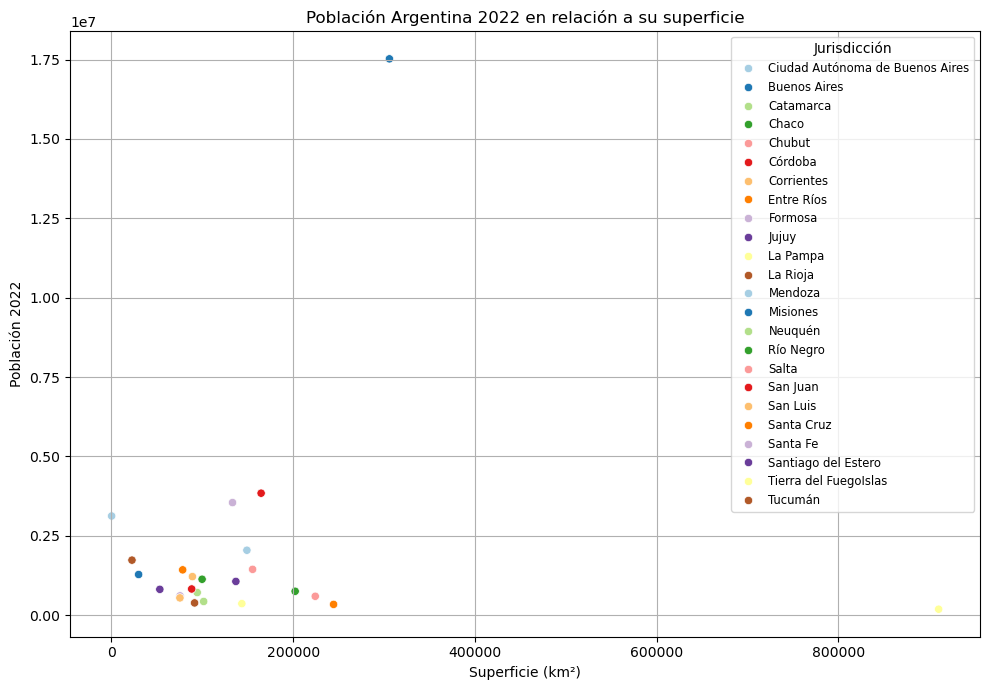

In [81]:
# Dispersión 

plt.figure(figsize=(10, 7))
sns.scatterplot(data=provincias_arg, x='Superficie', y='Poblacion2022', hue='Jurisdiccion', palette='Paired', legend='full')
plt.title('Población Argentina 2022 en relación a su superficie')
plt.xlabel('Superficie (km²)')
plt.ylabel('Población 2022')
plt.grid(True)
plt.legend(title='Jurisdicción', fontsize='small')
plt.tight_layout()
plt.savefig('grafico1Poblaciondensidad.png')
plt.show()


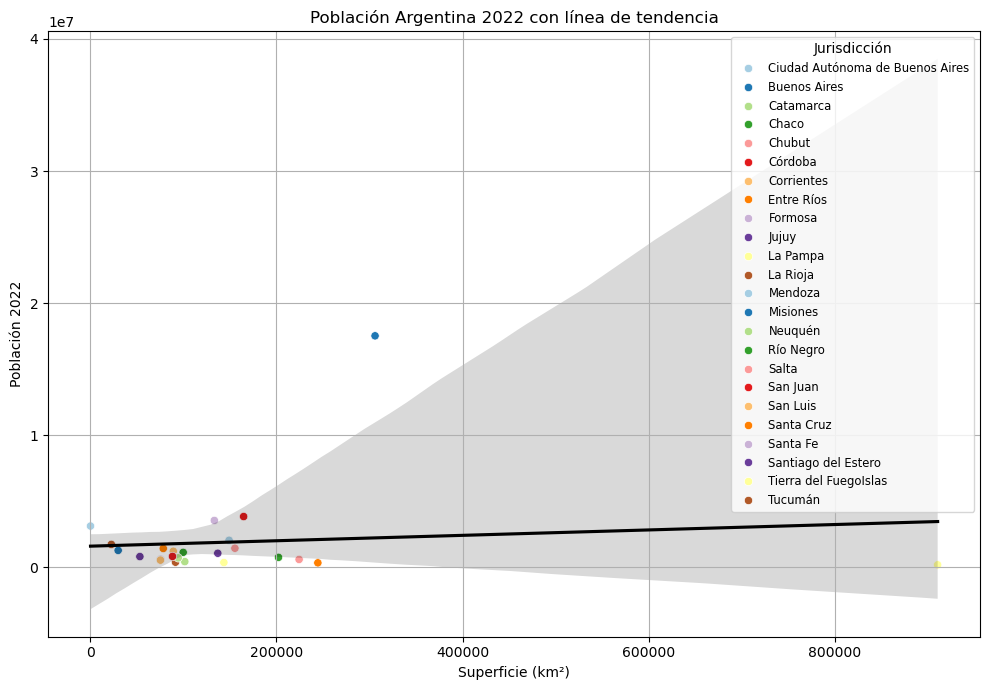

In [280]:
# Dispersión con linea de tendencia 

plt.figure(figsize=(10, 7))
sns.scatterplot(data=provincias_arg, x='Superficie', y='Poblacion2022', hue='Jurisdiccion', palette='Paired', legend='full')
sns.regplot(data=provincias_arg, x='Superficie', y='Poblacion2022', scatter=False, color='black')
plt.title('Población Argentina 2022 con línea de tendencia')
plt.xlabel('Superficie (km²)')
plt.ylabel('Población 2022')
plt.grid(True)
plt.legend(title='Jurisdicción', fontsize='small')
plt.tight_layout()
plt.savefig('grafico2Poblaciondensidad.png')
plt.show()


# Install and import the Prophet library

from fbprophet import Prophet


# Prepare your data
data = pd.DataFrame({
    'ds': pd.to_datetime(['1895-01-01', '1914-01-01', '1947-01-01', '1960-01-01', '1970-01-01', 
                          '1980-01-01', '1991-01-01', '2001-01-01', '2010-01-01', '2022-01-01']),
    'y': [4044911, 7903662, 15893827, 20013793, 23364431, 27949480, 32615528, 36260130, 40117096, 45892285]
})

# Create and fit the model with tuned parameters
model = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10)
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=10, freq='Y')

# Forecast
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Años')  # Change x-axis title
plt.ylabel('Población')  # Change y-axis title
plt.show()

# Calculate Mean Absolute Error (MAE)
actual_values = data['y'].values
predicted_values = forecast['yhat'][:len(data)].values
mae = np.mean(np.abs(actual_values - predicted_values))

# Print MAE
print("Mean Absolute Error (MAE):", mae)